# 1. Apartment prices in Ekhagen

In [61]:
import pandas as pd

# Data over apartment prices
booli_data = pd.read_csv('Booli_sold.csv')

# Prints column number and column name for navigation
for idx, col_name in enumerate(booli_data.columns):
    print(f"{idx}: {col_name}")


0: listPrice
1: rent
2: livingArea
3: rooms
4: published
5: constructionYear
6: objectType
7: booliId
8: soldDate
9: soldPrice
10: soldPriceSource
11: url
12: floor
13: additionalArea
14: apartmentNumber
15: plotArea
16: location.address.streetAddress
17: location.position.latitude
18: location.position.longitude
19: location.position.isApproximate
20: location.region.municipalityName
21: location.region.countyName
22: location.distance.ocean
23: source.name
24: source.id
25: source.type
26: source.url


In [44]:
# Cleaning the data, just removed some unused columns. 

booli_data_cleaned = pd.read_csv('Booli_sold.csv', usecols = [0,1,2,3,4,5,6,8,9,10,12,13,14,16,17,18,19,20,21,22,26])

for idx, col_name in enumerate(booli_data_cleaned.columns):
    print(f"{idx}: {col_name}")

0: listPrice
1: rent
2: livingArea
3: rooms
4: published
5: constructionYear
6: objectType
7: soldDate
8: soldPrice
9: soldPriceSource
10: floor
11: additionalArea
12: apartmentNumber
13: location.address.streetAddress
14: location.position.latitude
15: location.position.longitude
16: location.position.isApproximate
17: location.region.municipalityName
18: location.region.countyName
19: location.distance.ocean
20: source.url


In [52]:
# Calculate price per sqm 
booli_data_cleaned['price_per_sqm'] = booli_data_cleaned['soldPrice'] / booli_data_cleaned['livingArea']

# Create a new file with cleaned data and a price per sqm column. 
booli_data_cleaned.to_csv('Booli_with_price_per_sqm.csv', index=False)


In [62]:
# Sorting the data 

# Top 5 most expensive price per sqm 
top_5_expensive = booli_data_cleaned.sort_values(by='price_per_sqm', ascending = False).head(5)
print(top_5_expensive[['soldPrice', 'price_per_sqm', 'location.address.streetAddress', 'rooms', 'rent']])

top_5_expensive.to_csv('Booli_PPSQM_sorted.csv', index=False)

    soldPrice  price_per_sqm location.address.streetAddress  rooms    rent
67    2500000  104166.666667                  Ekhagsvägen 8    1.0  1464.0
50    2450000  102083.333333                  Ekhagsvägen 8    1.0  1464.0
54    2300000  100000.000000                 Ekhagsvägen 10    1.0  1374.0
34    2210000   88400.000000                Torphagsvägen 4    1.0  1144.0
55    2300000   85501.858736                Docentbacken 1B    1.0  1522.0


In [51]:
ekhagen_data = booli_data_cleaned

#Calculate average ppsqm for ekhagen
ekhagen_ppsqm = ekhagen_data['price_per_sqm'].mean()

print("Average price per sqm in Ekhagen is: ", ekhagen_ppsqm, "kr")



Average price per sqm in Ekhagen is:  58759.382760081724 kr


### Conclusion

Looking at the data it is interesting that the price per sqm seem to be much higher for 1 room apartments. 

In [65]:
# Average price per sqm for 1 room in Ekhagen
average_1room = booli_data_cleaned[booli_data_cleaned['rooms']==1]['price_per_sqm'].mean()
# Average price per sqm for >1 room in Ekhagen
average_moreroom = booli_data_cleaned[booli_data_cleaned['rooms']>1]['price_per_sqm'].mean()

print(average_1room)
print(average_moreroom)


74262.54386715256
56323.42298014156


# 2. The Swedish Election of 2018

### Number of valid votes in Stockholm 2018

In [88]:
# import problematic data
election_data = pd.read_csv('2018_R_per_kommun.csv', 
                           sep = ';', # semicolon as separator
                           decimal = ',', # comma for decimal points
                           encoding = 'utf-8') #utf-8 as encoder

# Test
print(election_data['KOMMUNNAMN'])
print(election_data['LÄNSKOD'])


0      Upplands Väsby
1          Vallentuna
2           Österåker
3              Värmdö
4            Järfälla
            ...      
285             Luleå
286             Piteå
287             Boden
288         Haparanda
289            Kiruna
Name: KOMMUNNAMN, Length: 290, dtype: object
0       1
1       1
2       1
3       1
4       1
       ..
285    25
286    25
287    25
288    25
289    25
Name: LÄNSKOD, Length: 290, dtype: int64


In [86]:
stockholm_data = election_data[election_data['KOMMUNNAMN'] == 'Stockholm']

total_votes_stockholm = stockholm_data['RÖSTER GILTIGA'].sum()

print("Total number of valid votes in Stockholm is: ", total_votes_stockholm)

Total number of valid votes in Stockholm is:  611206


### 2 Where did S gather the highest percentage of votes in 2018? 

In [90]:
# finding the maximum 

max_row = election_data['S'].idxmax()

kommun = election_data.loc[max_row, 'KOMMUNNAMN']
percentage = election_data.loc[max_row, 'S']

print(f"(S) highest voting percentage ({percentage:.2f}%) in {kommun}.")

(S) highest voting percentage (52.18%) in Munkfors.


### Ranking the 3 highest municipalities (kommuner) 

In [92]:
# finding the 3 top ranked in valdeltagande
top_3_tier = election_data.nlargest(3, 'VALDELTAGANDE') 

# putting them in a table
top_3_table = top_3_tier[['KOMMUNNAMN', 'VALDELTAGANDE']]

print(top_3_table)

    KOMMUNNAMN  VALDELTAGANDE
103      Lomma          93.86
59        Habo          93.35
98    Vellinge          93.13


# 3. Predicting Strokes

<Axes: xlabel='stroke', ylabel='age'>

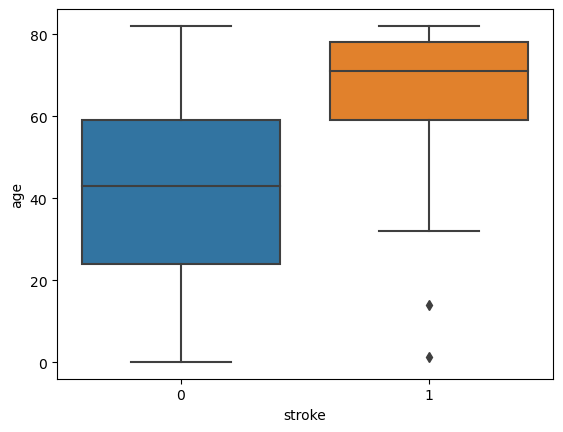

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns 

# loading the dataset
stroke_data = pd.read_csv('stroke-data.csv')


# scatter plot, 0 is no stroke, 1 is stroke
sns.boxplot(x='stroke', y='age', data = stroke_data)

Looking at the visualization we can clearly see that as you get older the number of stroke patients increases significantly. 

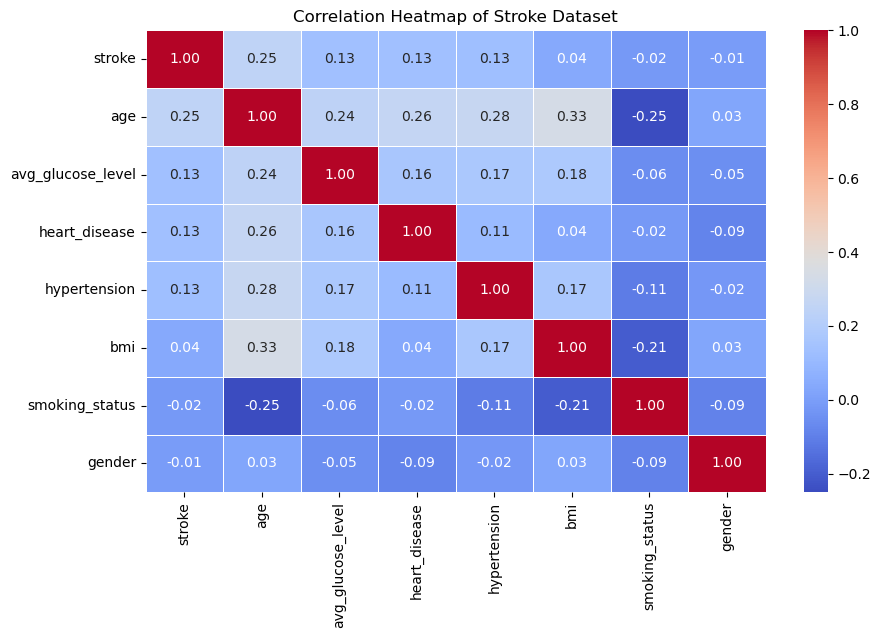

In [141]:
# Setting up a heatmap to see if we can find some correlations. 

# converting categorical to numerical

stroke_data['gender'] = stroke_data['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# If missing values are present, you can fill them (or drop them)
stroke_data['smoking_status'] = stroke_data['smoking_status'].fillna(0)  # Fill with 0 or another value
stroke_data['gender'] = stroke_data['gender'].fillna(0)  # Fill with 0 or another value

stroke_data['smoking_status'] = stroke_data['smoking_status'].map({'formerly smoked': 2, 'never smoked': 0, 'smokes': 1, 'Unknown': 3})

# numeric columns
numeric_data = stroke_data[['stroke', 'age', 'avg_glucose_level', 'heart_disease', 'hypertension', 'bmi', 'smoking_status', 'gender']]

# set up correlation matrix
correlation_matrix = numeric_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Stroke Dataset')
plt.show()





### Conclusion: 
If we follow the top row above in the heatmap above we can draw a few conclusions based on the analysis. 
Firstly, Age seems to be strongly coorrelated with stroke, so the older you get, the likelihood of a stroke increases. Secondly, the average glucose level is also a fairly strong correlation with a stroke, as well as previous heart diseases and high blood pressure. However glucose levels also intend to increase with age, making age the most significant variable in relation to stroke. Gender seem to have little to no correlation and for smoking status, i'm not sure. It would require a deeper analysis, one "interesting" fact could be that although, based on this analysis, smoking seem to have little to no correlation with stroke, one can see that smoking and age is not a good mix, so you could speculate that a heavy smoker might actually suffer from other diseases before reaching a stroke.    

So to draw a conclusion we can say that age is a significant contributer to potential stroke risk, much as we first guessed in with the boxplot above. 